In [1]:
# 卷积神经网络

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.4
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.21.6
pandas 1.3.5
sklearn 1.0.2
tensorflow 2.6.4
keras.api._v2.keras 2.6.0


In [3]:
# 查看英伟达GPU显卡型号信息
!nvidia-smi

Sun Jul 31 13:02:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [6]:
a = np.arange(1, 10).reshape(3, 3)
print(a)
b = a.reshape(3, 3, 1)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]

 [[7]
  [8]
  [9]]]


In [7]:
# model = keras.models.Sequential()
# # 添加卷积层 filters卷积核数目(输出的通道数目)  kernel_size卷积核大小
# # padding='same'表示进行填充，填充的值由算法内部根据卷积核大小计算，目的是让输出尺寸和输入相等；
# # padding='valid'表示不进行填充，即是padding=0，只使用有效的窗口位置，这是默认的选项
# # 步幅stride是一个一维的向量，长度为4，在tensorflow中，stride的一般形式是[1，x，y，1]
# # stride形式是[a,x,y,z]，分别代表[batch滑动步长，水平滑动步长，垂直滑动步长，通道滑动步长]
# model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
#                               padding='same',
#                               activation='relu',
#                               input_shape=(28, 28, 1)))
# model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
#                               padding='same',
#                               activation='relu'))
# # 添加池化层 pool_size是窗口大小，步长默认和窗口大小相等
# model.add(keras.layers.MaxPool2D(pool_size=2))
# # 缓解前面池化带来的信息损失，filters翻倍增加维度信息
# model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
#                               padding='same',
#                               activation='relu'))
# model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
#                               padding='same',
#                               activation='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
# model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
#                               padding='same',
#                               activation='relu'))
# model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
#                               padding='same',
#                               activation='relu'))
# model.add(keras.layers.MaxPool2D(pool_size=2))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
# model.add(keras.layers.Dense(10, activation="softmax"))
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='sgd',
#               metrics=['accuracy'])
# print(model.summary())

In [8]:
print(3 * 3 * 32 * 32 + 32)
print(3 * 3 * 64 * 64 + 64)

9248
36928


In [9]:
# 简化 与上面进行对比
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                              padding='same',
                              activation='relu',
                              input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=32,kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation="softmax"))
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
print(model.summary())

2022-07-31 13:02:05.994137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 13:02:06.105258: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 13:02:06.106147: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-31 13:02:06.107604: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 813,802
Trainable params: 813,802
Non-trainable params: 0
__________________________________________________

In [10]:
logdir = './cnn-relu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3), ]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

2022-07-31 13:02:08.921240: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-07-31 13:02:08.921281: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-07-31 13:02:08.923668: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-07-31 13:02:09.143574: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-07-31 13:02:09.143748: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-07-31 13:02:09.662733: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-31 13:02:10.952707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


   1/1719 [..............................] - ETA: 3:23:47 - loss: 2.3105 - accuracy: 0.0625

2022-07-31 13:02:16.846346: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-07-31 13:02:16.846389: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


   3/1719 [..............................] - ETA: 6:44 - loss: 2.2836 - accuracy: 0.0938

2022-07-31 13:02:17.124728: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-07-31 13:02:17.125144: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-07-31 13:02:17.260935: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 101 callback api events and 98 activity events. 
2022-07-31 13:02:17.267862: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-07-31 13:02:17.279914: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./cnn-relu-callbacks/train/plugins/profile/2022_07_31_13_02_17

2022-07-31 13:02:17.283242: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./cnn-relu-callbacks/train/plugins/profile/2022_07_31_13_02_17/d1a5969a7cff.trace.json.gz
2022-07-31 13:02:17.298156: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Crea

1719/1719 [==============================] - 13s 3ms/step - loss: 0.5732 - accuracy: 0.7984 - val_loss: 0.4148 - val_accuracy: 0.8534
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3619 - accuracy: 0.8696 - val_loss: 0.3487 - val_accuracy: 0.8798
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8878 - val_loss: 0.3178 - val_accuracy: 0.8890
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8983 - val_loss: 0.2880 - val_accuracy: 0.8994
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2555 - accuracy: 0.9074 - val_loss: 0.2927 - val_accuracy: 0.8956
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2362 - accuracy: 0.9133 - val_loss: 0.2534 - val_accuracy: 0.9076
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2191 - accuracy: 0.9197 - val_loss: 0.2578 - val_accuracy: 0.9

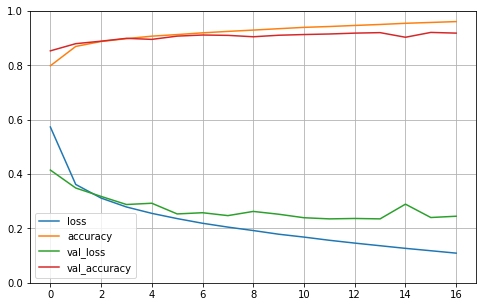

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()


plot_learning_curves(history)

In [12]:
print(model.evaluate(x_test_scaled, y_test, verbose=0))

[0.2710089087486267, 0.9136000275611877]


In [13]:
# 通过下面方法来确定某一层输出尺寸
x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.],
                 [7., 8., 9.]])
print(x.shape)
x = tf.reshape(x, [1, 3, 3, 1])
max_pool_2d=tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                         strides=(1,1),padding='valid')
print(x)
max_pool_2d(x)
gmp=tf.keras.layers.GlobalMaxPooling2D()
gmp(x)

(3, 3)
tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)


<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[9.]], dtype=float32)>